# Analyis of Tournament results

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [20]:
df = pd.read_csv("../runs/tournament_results.csv")

def parse_state_column(column):
    return column.apply(lambda x: tuple(ast.literal_eval(x)))

# Parse agent states into tuples with lists
# df['agent_a_state'] = parse_state_column(df['agent_a_state'])
# df['agent_b_state'] = parse_state_column(df['agent_b_state'])

# Convert total rewards to integers
df['total_reward_a'] = df['total_reward_a'].astype(int)
df['total_reward_b'] = df['total_reward_b'].astype(int)

df.head()

,agent_a,agent_b,total_reward_a,total_reward_b
0,DeepQLearningAgent,SuspiciousAdaptiveAgent,38444,16454
1,DeepQLearningAgent,SoftMajorityAgent,29998,29998
2,DeepQLearningAgent,SuspiciousGenerousTitForTatAgent,29148,29398
3,DeepQLearningAgent,SuspiciousPavlovAgent,30000,30000
4,DeepQLearningAgent,SpitefulAgent,30000,30000


In [21]:
df[df.agent_a == "DeepQLearningAgent"]

,agent_a,agent_b,total_reward_a,total_reward_b
0,DeepQLearningAgent,SuspiciousAdaptiveAgent,38444,16454
1,DeepQLearningAgent,SoftMajorityAgent,29998,29998
2,DeepQLearningAgent,SuspiciousGenerousTitForTatAgent,29148,29398
3,DeepQLearningAgent,SuspiciousPavlovAgent,30000,30000
4,DeepQLearningAgent,SpitefulAgent,30000,30000
5,DeepQLearningAgent,SuspiciousTitForTwoTatsAgent,29400,29400
6,DeepQLearningAgent,GenerousTitForTatAgent,30000,30000
7,DeepQLearningAgent,RandomAgent,22911,20686
8,DeepQLearningAgent,TitForTatOppositeAgent,49600,100
9,DeepQLearningAgent,SuspiciousSoftMajorityAgent,37500,17000


In [22]:
df[df.agent_a == "GenerousTitForTatAgent"]

,agent_a,agent_b,total_reward_a,total_reward_b
192,GenerousTitForTatAgent,SuspiciousAdaptiveAgent,29880,29930
193,GenerousTitForTatAgent,SoftMajorityAgent,30000,30000
194,GenerousTitForTatAgent,SuspiciousGenerousTitForTatAgent,29396,29671
195,GenerousTitForTatAgent,SuspiciousPavlovAgent,30000,30000
196,GenerousTitForTatAgent,SpitefulAgent,30000,30000
197,GenerousTitForTatAgent,SuspiciousTitForTwoTatsAgent,29876,29936
198,GenerousTitForTatAgent,GenerousTitForTatAgent,30000,30000
199,GenerousTitForTatAgent,RandomAgent,21854,24554
200,GenerousTitForTatAgent,TitForTatOppositeAgent,21052,23897
201,GenerousTitForTatAgent,SuspiciousSoftMajorityAgent,28723,29213


In [23]:
# Group by `agent_a` and sum up the rewards
agent_a_rewards = df.groupby("agent_a")["total_reward_a"].sum()

# Sort the results in descending order
sorted_agent_a_rewards = agent_a_rewards.sort_values(ascending=False)

# Print the sorted results
sorted_agent_a_rewards = pd.DataFrame(sorted_agent_a_rewards)
sorted_agent_a_rewards

,total_reward_a
agent_a,
DeepQLearningAgent,721840
GenerousTitForTatAgent,650747
AdaptiveAgent,643782
SoftMajorityAgent,638479
TitForTwoTatsAgent,636391
QLearningAgent,635164
GradualAgent,635057
TitForTatAgent,634992
AlwaysCooperateAgent,602772


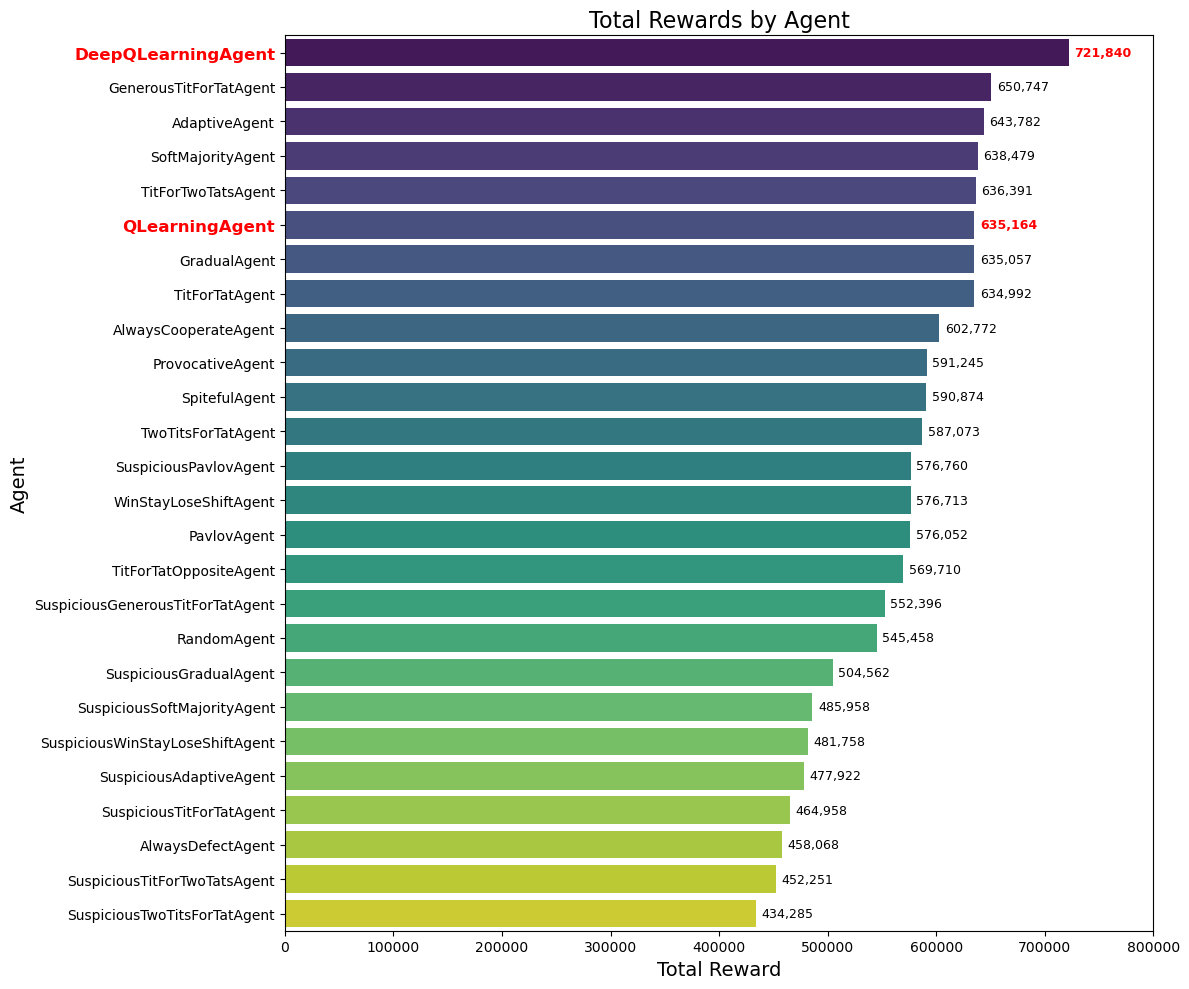

In [24]:
df = pd.DataFrame(list(sorted_agent_a_rewards.to_dict()['total_reward_a'].items()), columns=['Agent', 'Total Reward'])

# Sort the DataFrame by 'Total Reward' for better visualization
df = df.sort_values(by='Total Reward', ascending=False)

plt.figure(figsize=(12, 10))

# Create the bar plot
ax = sns.barplot(x='Total Reward', y='Agent', data=df, palette="viridis")

# Add annotations (values) on the bars
for i, bar in enumerate(ax.patches):
    agent_name = df.iloc[i]['Agent']  # Get the agent name for the current bar
    value = int(bar.get_width())  # Get the width of each bar (the total reward)

    # Style DeepQLearningAgent and QLearningAgent text in red and bold
    if agent_name in ['DeepQLearningAgent', 'QLearningAgent']:
        text_color = 'red'
        fontweight = 'bold'
    else:
        text_color = 'black'
        fontweight = 'normal'

    ax.text(
        value + 5000,  # x-coordinate (just to the right of the bar)
        bar.get_y() + bar.get_height() / 2,  # y-coordinate (center of the bar height)
        f'{value:,}',  # Format the value with commas
        va='center',  # Vertical alignment
        fontsize=9,  # Font size
        color=text_color,  # Text color
        fontweight=fontweight  # Font weight
    )

# Make y-axis labels for DeepQLearningAgent and QLearningAgent red and bold
for label in ax.get_yticklabels():
    if label.get_text() in ['DeepQLearningAgent', 'QLearningAgent']:
        label.set_color('red')
        label.set_fontweight('bold')
        label.set_fontsize(12)

# Add title and labels
plt.title("Total Rewards by Agent", fontsize=16)
plt.xlabel("Total Reward", fontsize=14)
plt.ylabel("Agent", fontsize=14)
plt.xlim([0, 800000])
# Adjust layout and show the plot
plt.tight_layout()
plt.show()